# TensorFlow Regression Example

## Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [5]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [6]:
my_data.head()

,X Data,Y
0,0.00000,6.306520
1,0.00001,5.771037
2,0.00002,5.760205
3,0.00003,5.505089
4,0.00004,4.380634


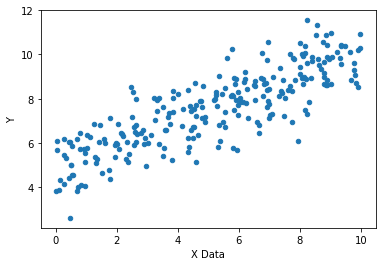

In [7]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [8]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "c:\users\nicola\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow', [dirname(__file__)])
  File "c:\users\nicola\appdata\local\programs\python\python36-32\lib\imp.py", line 297, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\nicola\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\__init__.py", line 54, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "c:\users\nicola\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 28, in <module>
    _pywrap_tensorflow = swig_import_helper()
  File "c:\users\nicola\appdata\local\programs\python\python36-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 20, in swig_import_helper
    import _pywrap_tensorflow
ModuleNotFoundError: No module named '_pywrap_tensorflow'


Error importing tensorflow.  Unless you are using bazel,
you should not try to import tensorflow from its source directory;
please exit the tensorflow source tree, and relaunch your python interpreter
from there.

In [ ]:
# Random 10 points to grab
batch_size = 8

** Variables **

In [ ]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

** Placeholders **

In [ ]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

** Graph **

In [ ]:
y_model = m*xph + b

** Loss Function **

In [ ]:
error = tf.reduce_sum(tf.square(yph-y_model))

** Optimizer **

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

** Initialize Variables **

In [ ]:
init = tf.global_variables_initializer()

### Session

In [ ]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [ ]:
model_m

In [ ]:
model_b

### Results

In [ ]:
y_hat = x_data * model_m + model_b

In [ ]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## tf.estimator API

Much simpler API for basic tasks like regression! We'll talk about more abstractions like TF-Slim later on.

In [ ]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [ ]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

### Set up Estimator Inputs

In [ ]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [ ]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [ ]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

### Train the Estimator

In [ ]:
estimator.train(input_fn=input_func,steps=1000)

### Evaluation

In [ ]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

In [ ]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

In [ ]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

### Predictions

In [ ]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [ ]:
list(estimator.predict(input_fn=input_fn_predict))

In [ ]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

In [ ]:
predictions

In [ ]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')

# Great Job!